In [12]:
import json
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for processing
import re
import nltk
## for bag-of-words
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing,feature_selection
## for explainer
from lime import lime_text
## for word embedding
import gensim
import gensim.downloader as gensim_api
## for deep learning
from tensorflow.keras import models, layers, preprocessing as kprocessing
from tensorflow.keras import backend as K
## for bert language model
import transformers
from time import time
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from time import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree

In [13]:
review1=pd.read_csv('Review_project_sentiment_wUser.csv')

In [14]:
review1.head(2)

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,...,language,text_clean,read_ease,polarity,subjectivity,Adj_ratio,review_count,NumElite,average_stars,NumofWords
0,1073206,JdReKgETiiJEDmshrO4TLw,pyarmAnR-i-qookQamqRTA,V2GOReqPvr8qpCC7sWfoTw,1.0,17,1,0,Just to let this car company that people DO re...,2014-03-06 12:38:52,...,en,let car company people read yelp check review ...,85.49,-0.500000,1.000000,0.120000,9,0,3.00,56
1,6229216,zL4se_Ixdcl8kvTOHCS3rg,s16-BUo-orUsELvMu5ocKg,VH0Ib9S3E-dxbQdQC4rffg,1.0,15,6,4,Mistral was the worst dining experience I have...,2010-07-22 18:08:01,...,en,mistral worst dining experience ever life bad ...,79.19,0.029864,0.502499,0.225888,1777,10,3.82,767


In [15]:
Total=review1[["text_clean", "read_ease", "polarity", "subjectivity", 
                           "Adj_ratio",'review_count','NumElite','NumofWords','useful_level']]

In [16]:
Total.head(10)

,text_clean,read_ease,polarity,subjectivity,Adj_ratio,review_count,NumElite,NumofWords,useful_level
0,let car company people read yelp check review ...,85.49,-0.500000,1.000000,0.120000,9,0,56,1
1,mistral worst dining experience ever life bad ...,79.19,0.029864,0.502499,0.225888,1777,10,767,1
2,took vip tour demon atlanta mercedes benz stad...,-32.40,0.422500,0.696111,0.218750,7,0,119,0
3,first came first time last year best friend ap...,83.96,0.168452,0.419841,0.168831,57,0,152,2
4,got takeout cannot speak service food good wou...,51.86,0.320000,0.780000,0.200000,41,0,36,0
5,horrific unprofessional rude owner awkward pic...,77.16,-0.218333,0.610833,0.133333,2,0,310,1
6,havent year going back soon best bagel evahhh ...,79.77,0.500000,0.150000,0.090909,19,0,17,0
7,ive several time every time become happy perso...,83.25,0.260957,0.587456,0.257143,525,6,227,0
8,blackened redfish taco celis white restaurant ...,87.21,0.215972,0.492361,0.360000,27,0,38,0
9,could give place zero star shouldve done resea...,49.19,0.217188,0.438333,0.117647,87,0,221,1


In [17]:
X = review1[["text_clean", "read_ease", "polarity", "subjectivity", 
                           "Adj_ratio",'review_count','NumElite','NumofWords']]

In [18]:
Y = np.array(review1["useful_level"].values)

In [19]:
## split dataset
X_train, X_test,y_train,y_test = model_selection.train_test_split(X,Y, test_size=0.1,stratify=Y)# 10% test size

In [20]:
X_train1, X_valid,y_train1,y_valid = model_selection.train_test_split(X_train,y_train, test_size=0.2,stratify=y_train)# 20% validation

In [21]:
corpus1 = X_train1['text_clean']

## create list of lists of unigrams
lst_corpus = []
for string in corpus1:
    lst_words = string.split() 
    lst_grams = [" ".join(lst_words[i:i+1]) for i in range(0, len(lst_words), 1)]
    lst_corpus.append(lst_grams)

In [22]:
nlp = gensim.models.word2vec.Word2Vec(lst_corpus, vector_size=300,  window=8, min_count=1, sg=1)# sg=1 skip gram/sg=0 SBOW

In [23]:
## tokenize text
tokenizer = kprocessing.text.Tokenizer(lower=True, split=' ', 
                     oov_token="NaN", 
                     filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(lst_corpus)
dic_vocabulary = tokenizer.word_index
## create sequence
lst_text2seq= tokenizer.texts_to_sequences(lst_corpus)
## padding sequence
X_w2v_train = kprocessing.sequence.pad_sequences(lst_text2seq, 
                    maxlen=200, padding="post", truncating="post")

In [24]:
i = 1

## list of text: ["I like this", ...]
len_txt = len(X_train1['text_clean'].iloc[i].split())
print("from: ",X_train1['text_clean'].iloc[i], "| len:", len_txt)

## sequence of token ids: [[1, 2, 3], ...]
len_tokens = len(X_w2v_train[i])
print("to: ", X_w2v_train[i], "| len:", len(X_w2v_train[i]))

## vocabulary: 
print("check: ", X_train1['text_clean'].iloc[i].split()[0], 
      " -- idx in vocabulary -->", 
      dic_vocabulary[X_train1['text_clean'].iloc[i].split()[0]])

print("vocabulary: ", dict(list(dic_vocabulary.items())[0:5]), "... (padding element, 0)")

from:  lunch waiting flight floor extremely sticky place reeked stale beer crumb everything table table cloth sticky well food small appeared microwaved im sure ruby good stay away unless drink | len: 29
to:  [  204   272   758   402   362  2006     4 11712  2948   192  4515    98
    71    71  4612  2006    22     8   114  1990  7524    18    78  4834
     7   314   143   728    72     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0 

In [25]:
# validation
corpus2 = X_valid['text_clean']

## create list of n-grams
lst_corpus2 = []
for string in corpus2:
    lst_words = string.split()
    lst_grams = [" ".join(lst_words[i:i+1]) for i in range(0, 
                 len(lst_words), 1)]
    lst_corpus2.append(lst_grams)

In [26]:
lst_text2seq2 = tokenizer.texts_to_sequences(lst_corpus2)

## padding sequence
X_w2v_valid = kprocessing.sequence.pad_sequences(lst_text2seq2, maxlen=200,
             padding="post", truncating="post")

In [27]:
# test
corpus3 = X_test['text_clean']

## create list of n-grams
lst_corpus3 = []
for string in corpus3:
    lst_words = string.split()
    lst_grams = [" ".join(lst_words[i:i+1]) for i in range(0, 
                 len(lst_words), 1)]
    lst_corpus3.append(lst_grams)

In [28]:
lst_text2seq3 = tokenizer.texts_to_sequences(lst_corpus3)

## padding sequence
X_w2v_test = kprocessing.sequence.pad_sequences(lst_text2seq3, maxlen=200,
             padding="post", truncating="post")

In [29]:
## start the matrix (length of vocabulary x vector size) with all 0s
embeddings = np.zeros((len(dic_vocabulary)+1, 300))
for word,idx in dic_vocabulary.items():
    ## update the row with vector
    try:
        embeddings[idx] =  nlp[word]
    ## if word not in model then skip and the row stays all 0s
    except:
        pass

In [ ]:
# X_w2v_train,y_train1    X_train1,y_train1
# X_w2v_valid,y_valid     X_valid,y_valid
# X_w2v_test,y_test       X_test,y_test

Final train set

In [30]:
AllotherTrain  = X_train1[["read_ease", "polarity", "subjectivity", 
                           "Adj_ratio",'review_count','NumElite','NumofWords']]

In [31]:
NewXTrain = pd.DataFrame(X_w2v_train)

In [32]:
for i in ["read_ease", "polarity", "subjectivity", "Adj_ratio",'review_count','NumElite','NumofWords']:
    NewXTrain[i] = AllotherTrain[i].values

In [33]:
NewXTrain.shape

(39734, 207)

final validation set

In [34]:
AllotherValid = X_valid[[ "read_ease", "polarity", "subjectivity", 
                           "Adj_ratio",'review_count','NumElite','NumofWords']]

In [35]:
NewXValid = pd.DataFrame(X_w2v_valid)

In [36]:
for i in [ "read_ease", "polarity", "subjectivity", "Adj_ratio",'review_count','NumElite','NumofWords']:
    NewXValid[i] = AllotherValid[i].values

In [37]:
NewXValid.shape

(9934, 207)

final test set

In [38]:
AllotherTest = X_test[[ "read_ease", "polarity", "subjectivity", 
                           "Adj_ratio",'review_count','NumElite','NumofWords']]

In [39]:
NewXtest = pd.DataFrame(X_w2v_test)

In [40]:
for i in [ "read_ease", "polarity", "subjectivity", "Adj_ratio",'review_count','NumElite','NumofWords']:
    NewXtest[i] = AllotherTest[i].values

In [41]:
NewXtest.shape

(5519, 207)

In [42]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import tree
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from time import time


model evaluation Def Function

In [44]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import itertools
def model_evaluation(model1):
    classes = np.unique(y_test)
    y_test_array = pd.get_dummies(y_test, drop_first=False).values
    t0 = time()
    model1.fit(NewXTrain, y_train1.astype(int))
    ## test
    predicted = model1.predict(NewXValid)
    predicted_prob = model1.predict_proba(NewXValid)
    print('Training Time:', time() - t0)
    print('')
    accuracy = metrics.accuracy_score(y_valid, predicted)
    auc = metrics.roc_auc_score(y_valid, predicted_prob, 
                                multi_class="ovr")
    print('\033[1m' + 'Validation Set')
    print('\033[0m')
    print("Accuracy:",  round(accuracy,2))
    print("Auc:", round(auc,2))
    print('Macros:')
    print("F1 Score:", f1_score(y_valid, predicted, average='macro'))
    print("Precision:", precision_score(y_valid, predicted, average='macro'))
    print("Recall:", recall_score(y_valid, predicted, average='macro'))
    print('Micros:')
    print("F1 Score:", f1_score(y_valid, predicted, average='micro'))
    print("Precision:", precision_score(y_valid, predicted, average='micro'))
    print("Recall:", recall_score(y_valid, predicted, average='micro'))


    print("Detail Report:")
    print(metrics.classification_report(y_valid, predicted))

    predicted = model1.predict(NewXtest)
    predicted_prob = model1.predict_proba(NewXtest)
    accuracy = metrics.accuracy_score(y_test, predicted)
    auc = metrics.roc_auc_score(y_test, predicted_prob, 
                                multi_class="ovr")
    print('\033[1m' + 'Test Set')
    print('\033[0m')
    print("Accuracy:",  round(accuracy,2))
    print("Auc:", round(auc,2))
    print('Macros:')
    print("F1 Score:", f1_score(y_test, predicted, average='macro'))
    print("Precision:", precision_score(y_test, predicted, average='macro'))
    print("Recall:", recall_score(y_test, predicted, average='macro'))
    print('Micros:')
    print("F1 Score:", f1_score(y_test, predicted, average='micro'))
    print("Precision:", precision_score(y_test, predicted, average='micro'))
    print("Recall:", recall_score(y_test, predicted, average='micro'))

    print("Detail Report:")
    print(metrics.classification_report(y_test, predicted))
    
    
     ## Plot confusion matrix
    cm = metrics.confusion_matrix(y_test, predicted)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, cbar=False)
    #classes = ["0","1","2"]
    ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, yticklabels=classes, title="Confusion matrix")
    plt.yticks(rotation=0)
    plt.show()
    
    # plot roc curve
    y_test1 = label_binarize(y_test, classes=[0, 1, 2])
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
        fpr[i], tpr[i], _ = metrics.roc_curve(y_test1[:, i], predicted_prob[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    colors = itertools.cycle(['blue', 'red', 'green'])
    for i, color in zip(range(3), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=1,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=0.6)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data')
    plt.legend(loc="lower right")
    plt.show()
    
    
     ## Plot precision-recall curve
    
    for i in range(len(classes)):
        precision, recall, thresholds = metrics.precision_recall_curve(y_test_array[:,i], predicted_prob[:,i])
        plt.plot(recall, precision, lw=1, label='{0} (area={1:0.2f})'.format(classes[i], metrics.auc(recall, precision)))
    #plt.set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', ylabel="Precision", title="Precision-Recall curve")
    plt.xlim([0.0,1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title("Precision-Recall curve")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

LogisticRegression

C:\Users\Fannie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Time: 2.2415056228637695

Validation Set

Accuracy: 0.59
Auc: 0.72
Macros:
F1 Score: 0.5148080574275434
Precision: 0.5552734175018633
Recall: 0.5233433567267809
Micros:
F1 Score: 0.5879806724380914
Precision: 0.5879806724380914
Recall: 0.5879806724380914
Detail Report:
              precision    recall  f1-score   support

           0       0.64      0.90      0.75      4361
           1       0.49      0.42      0.45      3124
           2       0.54      0.25      0.34      2449

    accuracy                           0.59      9934
   macro avg       0.56      0.52      0.51      9934
weighted avg       0.57      0.59      0.56      9934

Test Set

Accuracy: 0.6
Auc: 0.72
Macros:
F1 Score: 0.5255254859527049
Precision: 0.563079275090892
Recall: 0.5324023517918344
Micros:
F1 Score: 0.5953977169777134
Precision: 0.5953977169777134
Recall: 0.5953977169777134
Detail Report:
              precision    recall  f1-score   support

           0       0.65      0.90      0.75      

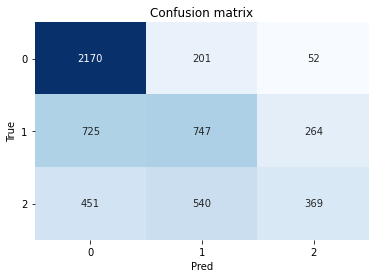

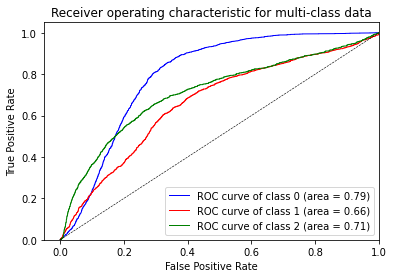

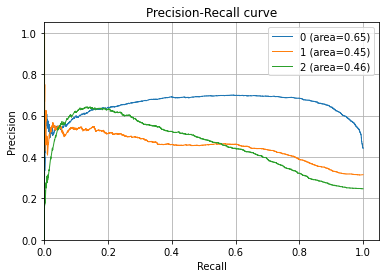

In [45]:
model_evaluation(model1=LogisticRegression(max_iter = 100))

XGB

C:\Users\Fannie\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:04:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Time: 20.00140643119812

Validation Set

Accuracy: 0.67
Auc: 0.83
Macros:
F1 Score: 0.629927662634319
Precision: 0.6623007408171977
Recall: 0.6252549961935948
Micros:
F1 Score: 0.6696194886249245
Precision: 0.6696194886249245
Recall: 0.6696194886249245
Detail Report:
              precision    recall  f1-score   support

           0       0.73      0.87      0.79      4361
           1       0.56      0.60      0.58      3124
           2       0.69      0.41      0.52      2449

    accuracy                           0.67      9934
   macro avg       0.66      0.63      0.63      9934
weighted avg       0.67      0.67      0.66      9934

Test Set

Accuracy: 0.67
Auc: 0

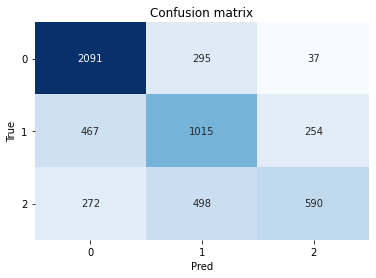

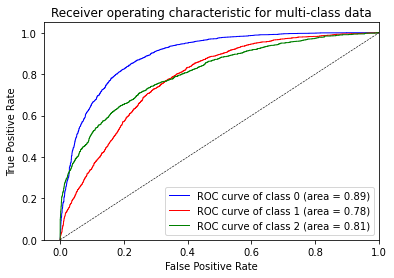

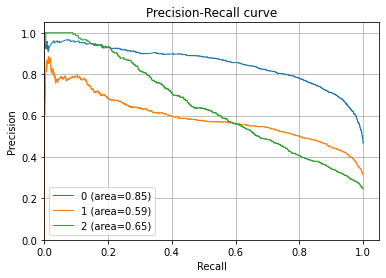

In [46]:
import xgboost as xgb
model_evaluation(model1=xgb.XGBClassifier())

Decision Tree

Training Time: 4.807390213012695

Validation Set

Accuracy: 0.56
Auc: 0.66
Macros:
F1 Score: 0.5407016538033266
Precision: 0.540845548888367
Recall: 0.5405762911496567
Micros:
F1 Score: 0.5645258707469297
Precision: 0.5645258707469297
Recall: 0.5645258707469297
Detail Report:
              precision    recall  f1-score   support

           0       0.68      0.69      0.69      4361
           1       0.48      0.47      0.48      3124
           2       0.46      0.46      0.46      2449

    accuracy                           0.56      9934
   macro avg       0.54      0.54      0.54      9934
weighted avg       0.56      0.56      0.56      9934

Test Set

Accuracy: 0.56
Auc: 0.66
Macros:
F1 Score: 0.5400665938363374
Precision: 0.5402031347789372
Recall: 0.5399639072275829
Micros:
F1 Score: 0.5616959594129372
Precision: 0.5616959594129372
Recall: 0.5616959594129372
Detail Report:
              precision    recall  f1-score   support

           0       0.67      0.68      0.68      

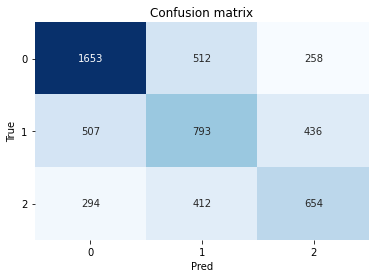

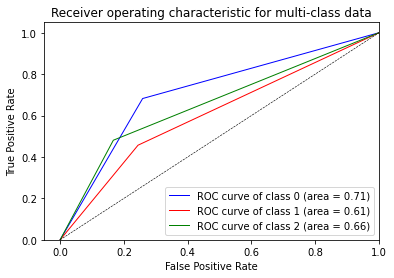

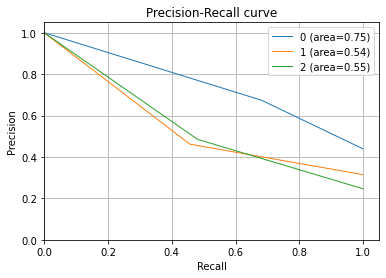

In [47]:
model_evaluation(model1=tree.DecisionTreeClassifier())

KNN

Training Time: 270.39557123184204

Validation Set

Accuracy: 0.49
Auc: 0.64
Macros:
F1 Score: 0.37103229575892
Precision: 0.4432894448203603
Recall: 0.4104019656870694
Micros:
F1 Score: 0.49315482182403864
Precision: 0.49315482182403864
Recall: 0.49315482182403864
Detail Report:
              precision    recall  f1-score   support

           0       0.51      0.91      0.65      4361
           1       0.46      0.22      0.30      3124
           2       0.35      0.11      0.16      2449

    accuracy                           0.49      9934
   macro avg       0.44      0.41      0.37      9934
weighted avg       0.46      0.49      0.42      9934

Test Set

Accuracy: 0.5
Auc: 0.64
Macros:
F1 Score: 0.3800355145672767
Precision: 0.4588238949272639
Recall: 0.4166004004946273
Micros:
F1 Score: 0.4982786736727668
Precision: 0.4982786736727668
Recall: 0.4982786736727668
Detail Report:
              precision    recall  f1-score   support

           0       0.51      0.91      0.66    

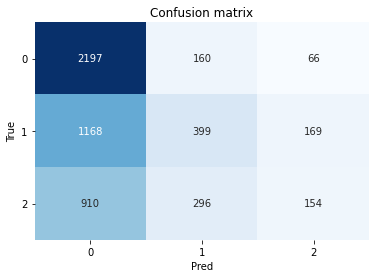

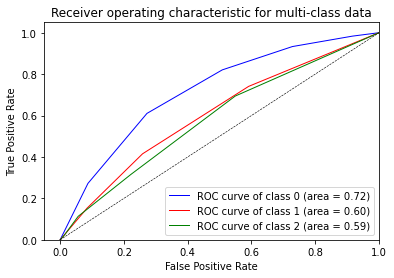

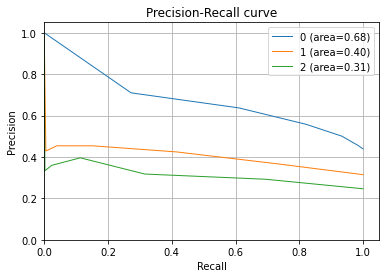

In [48]:
model_evaluation(model1=KNeighborsClassifier())

RandomForest

Training Time: 24.005252838134766

Validation Set

Accuracy: 0.63
Auc: 0.79
Macros:
F1 Score: 0.5683096309806429
Precision: 0.6119940210958741
Recall: 0.5726984732754616
Micros:
F1 Score: 0.6298570565733843
Precision: 0.6298570565733843
Recall: 0.6298570565733843
Detail Report:
              precision    recall  f1-score   support

           0       0.71      0.87      0.78      4361
           1       0.52      0.56      0.54      3124
           2       0.62      0.28      0.39      2449

    accuracy                           0.63      9934
   macro avg       0.61      0.57      0.57      9934
weighted avg       0.62      0.63      0.61      9934

Test Set

Accuracy: 0.63
Auc: 0.8
Macros:
F1 Score: 0.5761509050687655
Precision: 0.6112516245534908
Recall: 0.5785050043741752
Micros:
F1 Score: 0.632542127196956
Precision: 0.632542127196956
Recall: 0.632542127196956
Detail Report:
              precision    recall  f1-score   support

           0       0.72      0.86      0.78      24

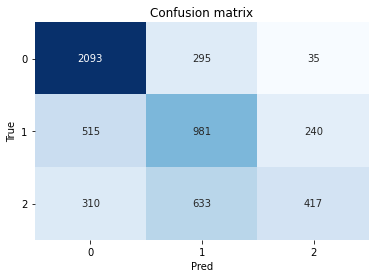

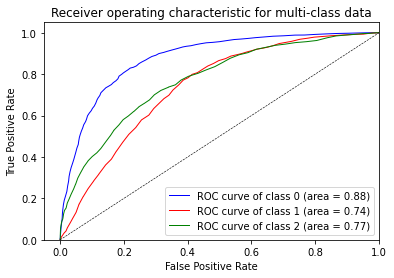

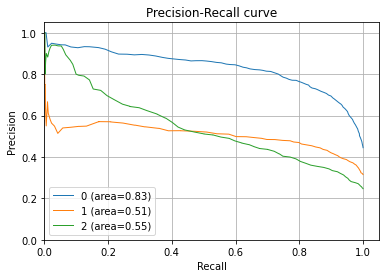

In [49]:
model_evaluation(model1=RandomForestClassifier())

MLP

Training Time: 28.334628343582153

Validation Set

Accuracy: 0.58
Auc: 0.73
Macros:
F1 Score: 0.44170650144157025
Precision: 0.47458828767767813
Recall: 0.5147554413753804
Micros:
F1 Score: 0.5791222065633179
Precision: 0.5791222065633179
Recall: 0.5791222065633179
Detail Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      4361
           1       0.44      0.79      0.57      3124
           2       0.23      0.00      0.00      2449

    accuracy                           0.58      9934
   macro avg       0.47      0.51      0.44      9934
weighted avg       0.53      0.58      0.51      9934

Test Set

Accuracy: 0.58
Auc: 0.72
Macros:
F1 Score: 0.43995762812424544
Precision: 0.4773679442191077
Recall: 0.5120996708563207
Micros:
F1 Score: 0.5751041855408588
Precision: 0.5751041855408588
Recall: 0.5751041855408588
Detail Report:
              precision    recall  f1-score   support

           0       0.76      0.74      0.75 

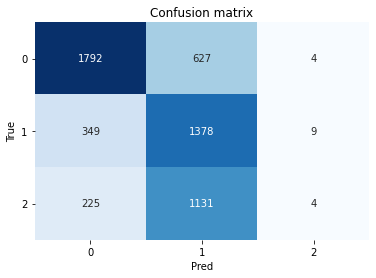

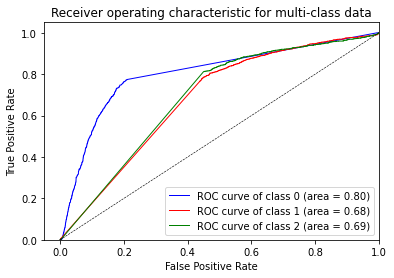

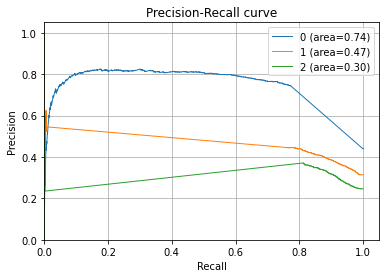

In [50]:
from sklearn.neural_network import MLPClassifier
model_evaluation(model1=MLPClassifier(random_state=1, max_iter=500))